In [2]:
#**Question-1**-->Delivery_time -> Predict delivery time using sorting time.
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf

In [3]:
delivery=pd.read_csv(r"E:\assignments csv  files\delivery_time.csv")

In [4]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
delivery.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery.shape

(21, 2)

In [9]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [10]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [11]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

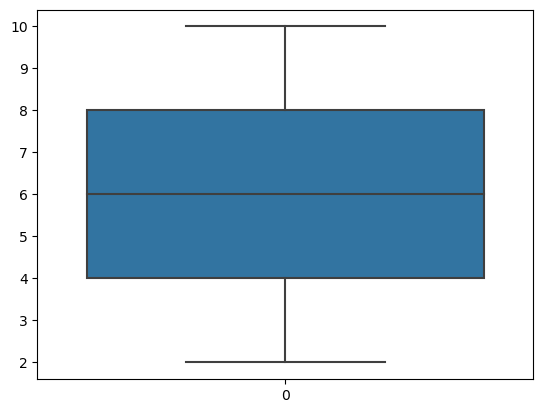

In [12]:
sns.boxplot(delivery['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Count'>

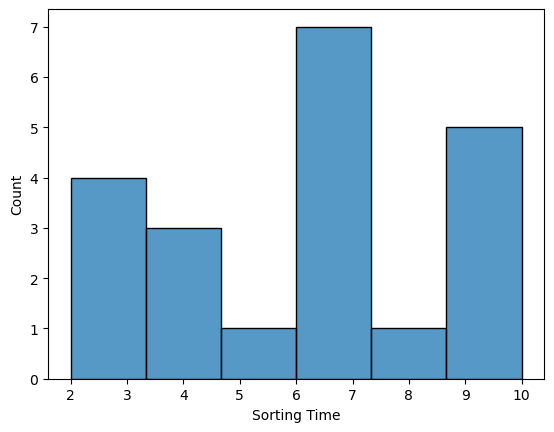

In [13]:
sns.histplot(delivery['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Count'>

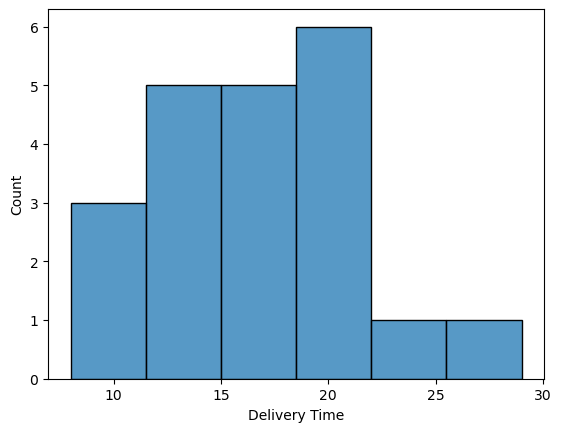

In [14]:
sns.histplot(delivery['Delivery Time'])

<Axes: >

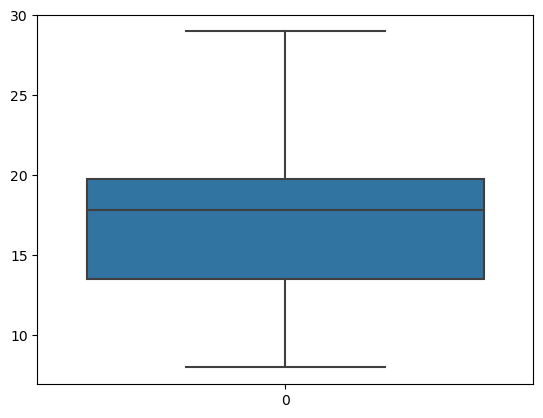

In [15]:
sns.boxplot(delivery['Delivery Time'])

In [16]:
delivery.rename({"Delivery Time":"deliverytime","Sorting Time":"sortingtime"},inplace=True,axis=1)

In [17]:
import statsmodels.formula.api as smf
model_1=smf.ols("deliverytime~sortingtime",data=delivery).fit()

In [18]:
model_1.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

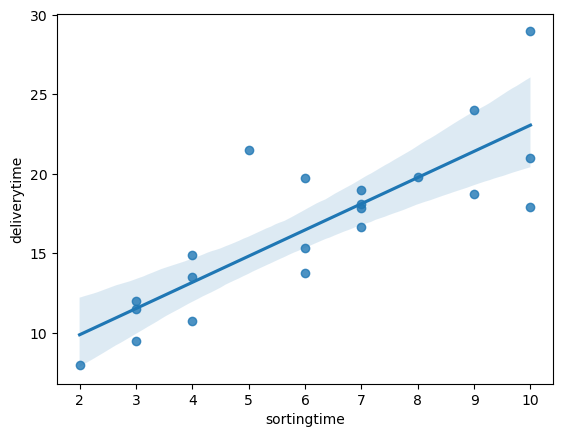

In [19]:
sns.regplot(x='sortingtime',y='deliverytime',data=delivery)

In [20]:
print(model_1.tvalues,'\n',model_1.pvalues)

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [21]:
(model_1.rsquared,model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [22]:
# apply log transformation to improve accuracy

In [23]:
new_sortingtime=np.log(delivery['sortingtime'])
new_sortingtime.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: sortingtime, dtype: float64

<Axes: xlabel='sortingtime', ylabel='Density'>

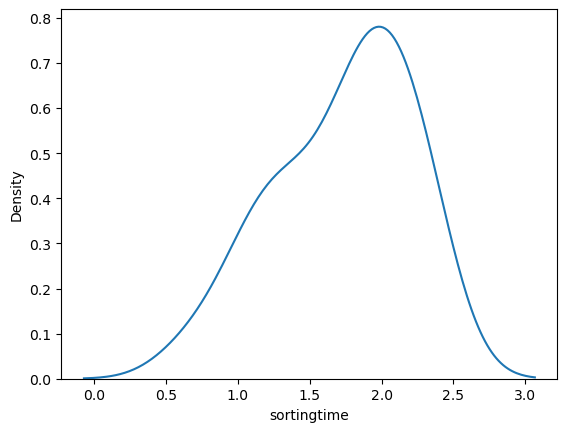

In [24]:
sns.kdeplot(new_sortingtime)

In [25]:
model_2=smf.ols("deliverytime~new_sortingtime",data=delivery).fit()

In [26]:
(model_2.rsquared,model_2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [27]:
# apply square-root transformation to improve accuracy

In [28]:
new_sortingtime=np.sqrt(delivery['sortingtime'])
new_sortingtime.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: sortingtime, dtype: float64

<Axes: xlabel='sortingtime', ylabel='Density'>

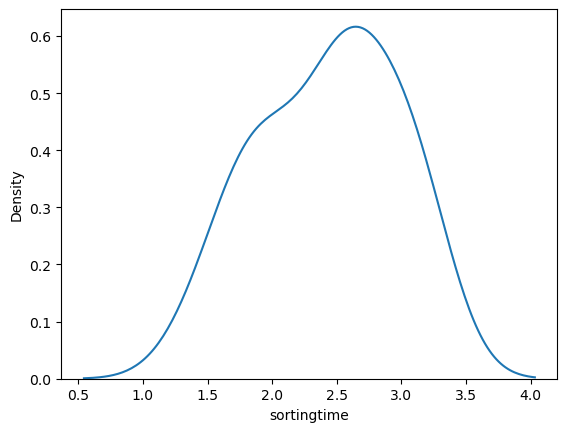

In [29]:
sns.kdeplot(new_sortingtime)

In [30]:
model_3=smf.ols('deliverytime~new_sortingtime',data=delivery).fit()

In [32]:
(model_3.rsquared,model_3.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [33]:
 #apply power transformation for increase accuracy
    

In [34]:
new_sortingtime=(delivery["sortingtime"])**2
new_sortingtime.head()

0    100
1     16
2     36
3     81
4    100
Name: sortingtime, dtype: int64

<Axes: xlabel='sortingtime', ylabel='Density'>

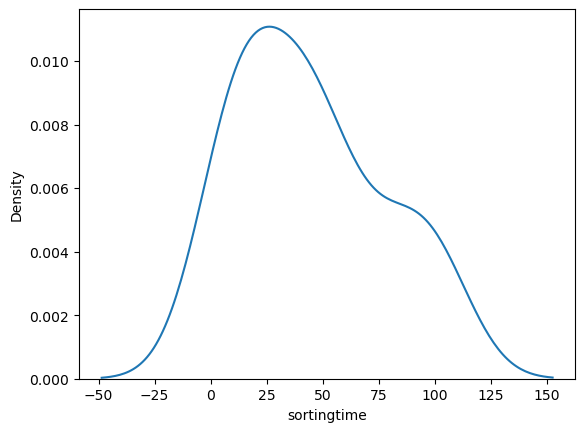

In [35]:
sns.kdeplot(new_sortingtime)

In [36]:
model_4=smf.ols("deliverytime~new_sortingtime",data=delivery).fit()

In [37]:
(model_4.rsquared,model_4.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [38]:
 #exponential transformation to increase accuracy

In [39]:
new_sortingtime=np.exp(delivery["sortingtime"])
new_sortingtime.head()

0    22026.465795
1       54.598150
2      403.428793
3     8103.083928
4    22026.465795
Name: sortingtime, dtype: float64

<Axes: xlabel='sortingtime', ylabel='Density'>

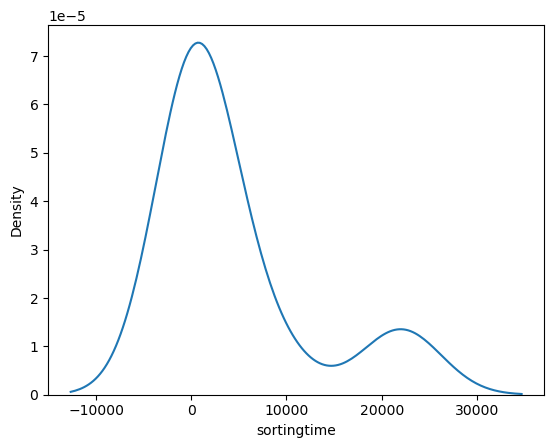

In [41]:
sns.kdeplot(new_sortingtime)
            

In [42]:
model_5=smf.ols("deliverytime~new_sortingtime",data=delivery).fit()

In [43]:
model_5.rsquared,model_5.rsquared_adj

(0.361117702270909, 0.3274923181799042)

In [44]:
# predict for new datapoint


In [45]:
newdata=pd.Series([17,11,20])

In [46]:
data_pred=pd.DataFrame(newdata,columns=["new_sortingtime"])

In [47]:
model_3.predict(data_pred)

0    132.403206
1     84.783662
2    156.212978
dtype: float64

# question 2

In [49]:
#Question-2-->**Salary_hike -> Build a prediction model for Salary_hike
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [61]:
salary=pd.read_csv(r"E:\assignments csv  files\Salary_Data.csv")

In [62]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [64]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [65]:
salary.shape

(30, 2)

In [67]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [69]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [70]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [71]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

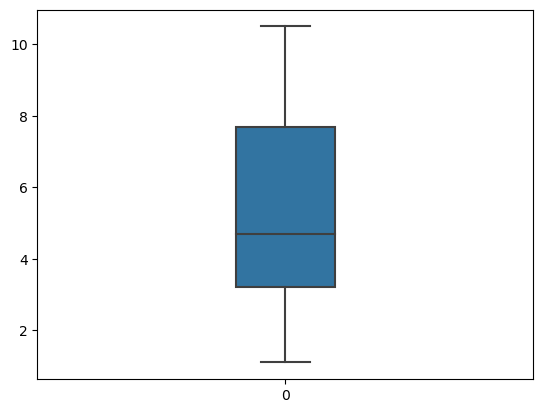

In [72]:
sns.boxplot(salary.YearsExperience,width=0.2)

<Axes: >

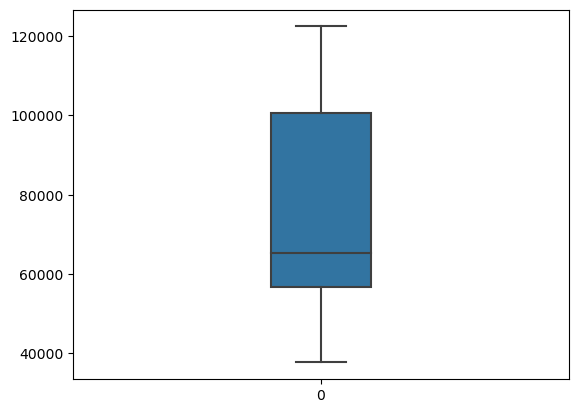

In [74]:
sns.boxplot(salary.Salary,width=0.2)

In [75]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [79]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

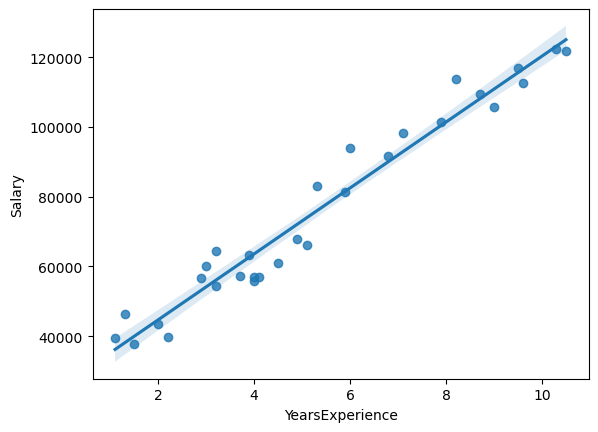

In [80]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [81]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [82]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [84]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [85]:
# log transmission 

In [87]:
new_experience=np.log(salary['YearsExperience'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

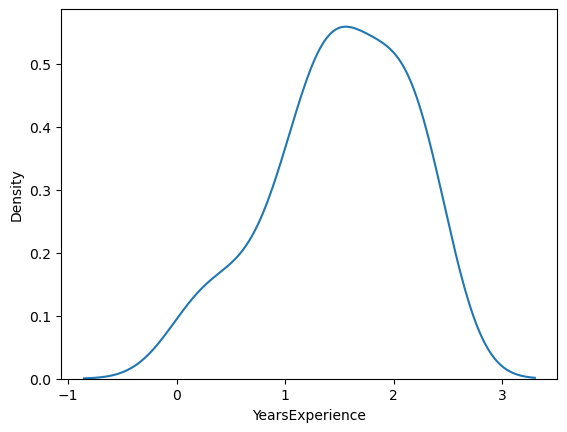

In [88]:
sns.kdeplot(new_experience)

In [92]:
model_2=smf.ols('Salary~new_experience',data=salary).fit()

In [93]:
(model_2.rsquared,model_2.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

In [94]:
# square root transformation

<Axes: xlabel='YearsExperience', ylabel='Density'>

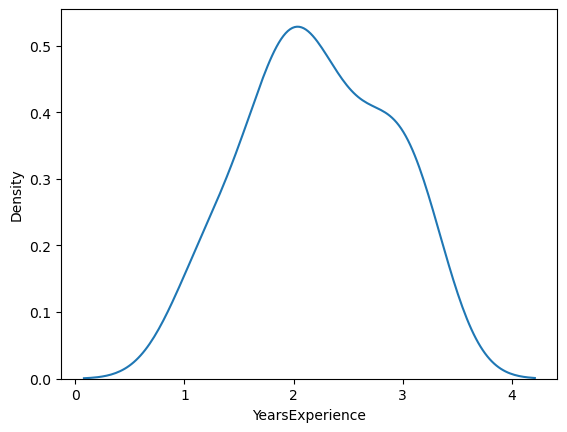

In [95]:
new_experience=np.sqrt(salary["YearsExperience"])
sns.kdeplot(new_experience)

In [96]:
model_3=smf.ols("Salary~new_experience",data=salary).fit()
(model_3.rsquared,model_3.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [97]:
# apply exponential function

<Axes: xlabel='YearsExperience', ylabel='Density'>

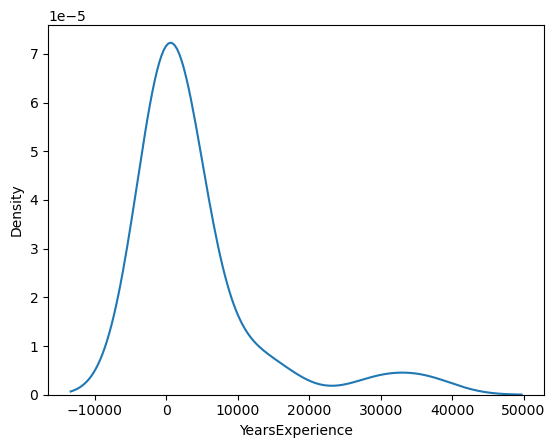

In [98]:
new_experience=np.exp(salary["YearsExperience"])
sns.kdeplot(new_experience)

In [100]:
model_4=smf.ols("Salary~new_experience",data=salary).fit()
(model_4.rsquared,model_4.rsquared_adj)

(0.47238440560728734, 0.45354099152183325)

In [101]:
# model prediction 

In [103]:
newdata=pd.Series([12,15,20])

In [104]:
newdata

0    12
1    15
2    20
dtype: int64

In [105]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [106]:
model.predict(data_pred)

0    139191.748056
1    167541.635020
2    214791.446628
dtype: float64